In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\DATA ANALYSIS\知了资料\07数据分析实战代码\数据分析实战代码\data\blackfriday\BlackFriday.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [4]:
df.dropna(inplace=True) #删除缺失值

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164278 entries, 1 to 537573
Data columns (total 12 columns):
User_ID                       164278 non-null int64
Product_ID                    164278 non-null object
Gender                        164278 non-null object
Age                           164278 non-null object
Occupation                    164278 non-null int64
City_Category                 164278 non-null object
Stay_In_Current_City_Years    164278 non-null object
Marital_Status                164278 non-null int64
Product_Category_1            164278 non-null int64
Product_Category_2            164278 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      164278 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 21.3+ MB


In [10]:
# 查看每个用户的消费金额情况
values = df.groupby("User_ID")['Purchase'].sum()
values.head()

User_ID
1000001    175466
1000002    327810
1000003    190820
1000004    139606
1000005    154282
Name: Purchase, dtype: int64

In [11]:
# sns.distplot(values) #分布图
# sns.boxplot(y=values)#箱线竖图（从上到下依次是：下线-25%-50%-75%-上线-异常值（土豪））
#二八定律：先对values从大到小排序，提取前面 20%的数值（再求总的这些值的和）/总的金额
values.sort_values(ascending=False)[:int(values.count()*0.2)].sum()/values.sum()

#20%的人产生了54%的销售额，要分析这些人群，做营销

0.5493025604805952

([<matplotlib.patches.Wedge at 0x1dff611e610>,
 [Text(0.11943788263913328, 1.0934964984812163, 'M_0'),
  Text(-0.8005498237242125, -0.7544004107469272, 'M_1'),
  Text(0.5975030916772912, -0.9235746074010907, 'F_0'),
  Text(1.0539748645255957, -0.31486026257413363, 'F_1')],
 [Text(0.06514793598498178, 0.5964526355352089, '46.54%'),
  Text(-0.4366635402132068, -0.4114911331346875, '30.98%'),
  Text(0.3259107772785224, -0.5037679676733221, '13.24%'),
  Text(0.5748953806503249, -0.17174196140407286, '9.24%')])

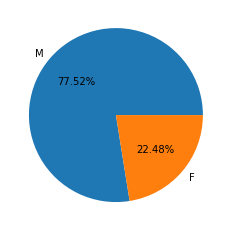

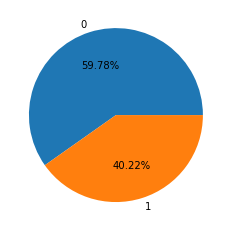

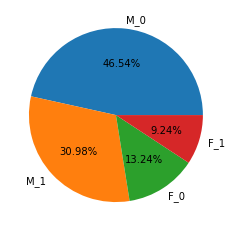

In [13]:
# 性别的分布
gender = df['Gender'].value_counts()#看男女生有多少：先对性别分组，再分别取值
plt.pie(gender.values,labels=gender.index,autopct="%.2f%%")

# 婚姻状况的分布（没结婚的是0，结婚的是1）
plt.figure()
marial = df['Marital_Status'].value_counts()
plt.pie(marial.values,labels=marial.index,autopct="%.2f%%")

# 性别和婚姻状况组合的分布（要读取每一行性别和婚姻状况，形成新的列）
# %s_%s分别是性别和是否结婚，axis=1按行读取，往右边，读取值的数量
plt.figure()
gender_marial = df.apply(lambda row: "%s_%s"%(row['Gender'],row['Marital_Status']),axis=1).value_counts()
plt.pie(gender_marial.values,labels=gender_marial.index,autopct="%.2f%%")

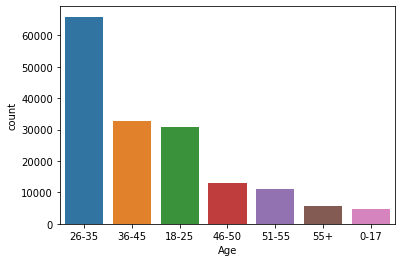

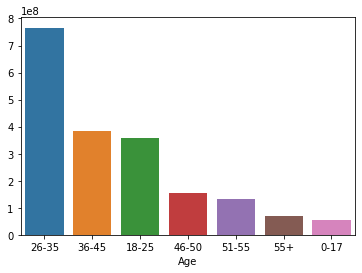

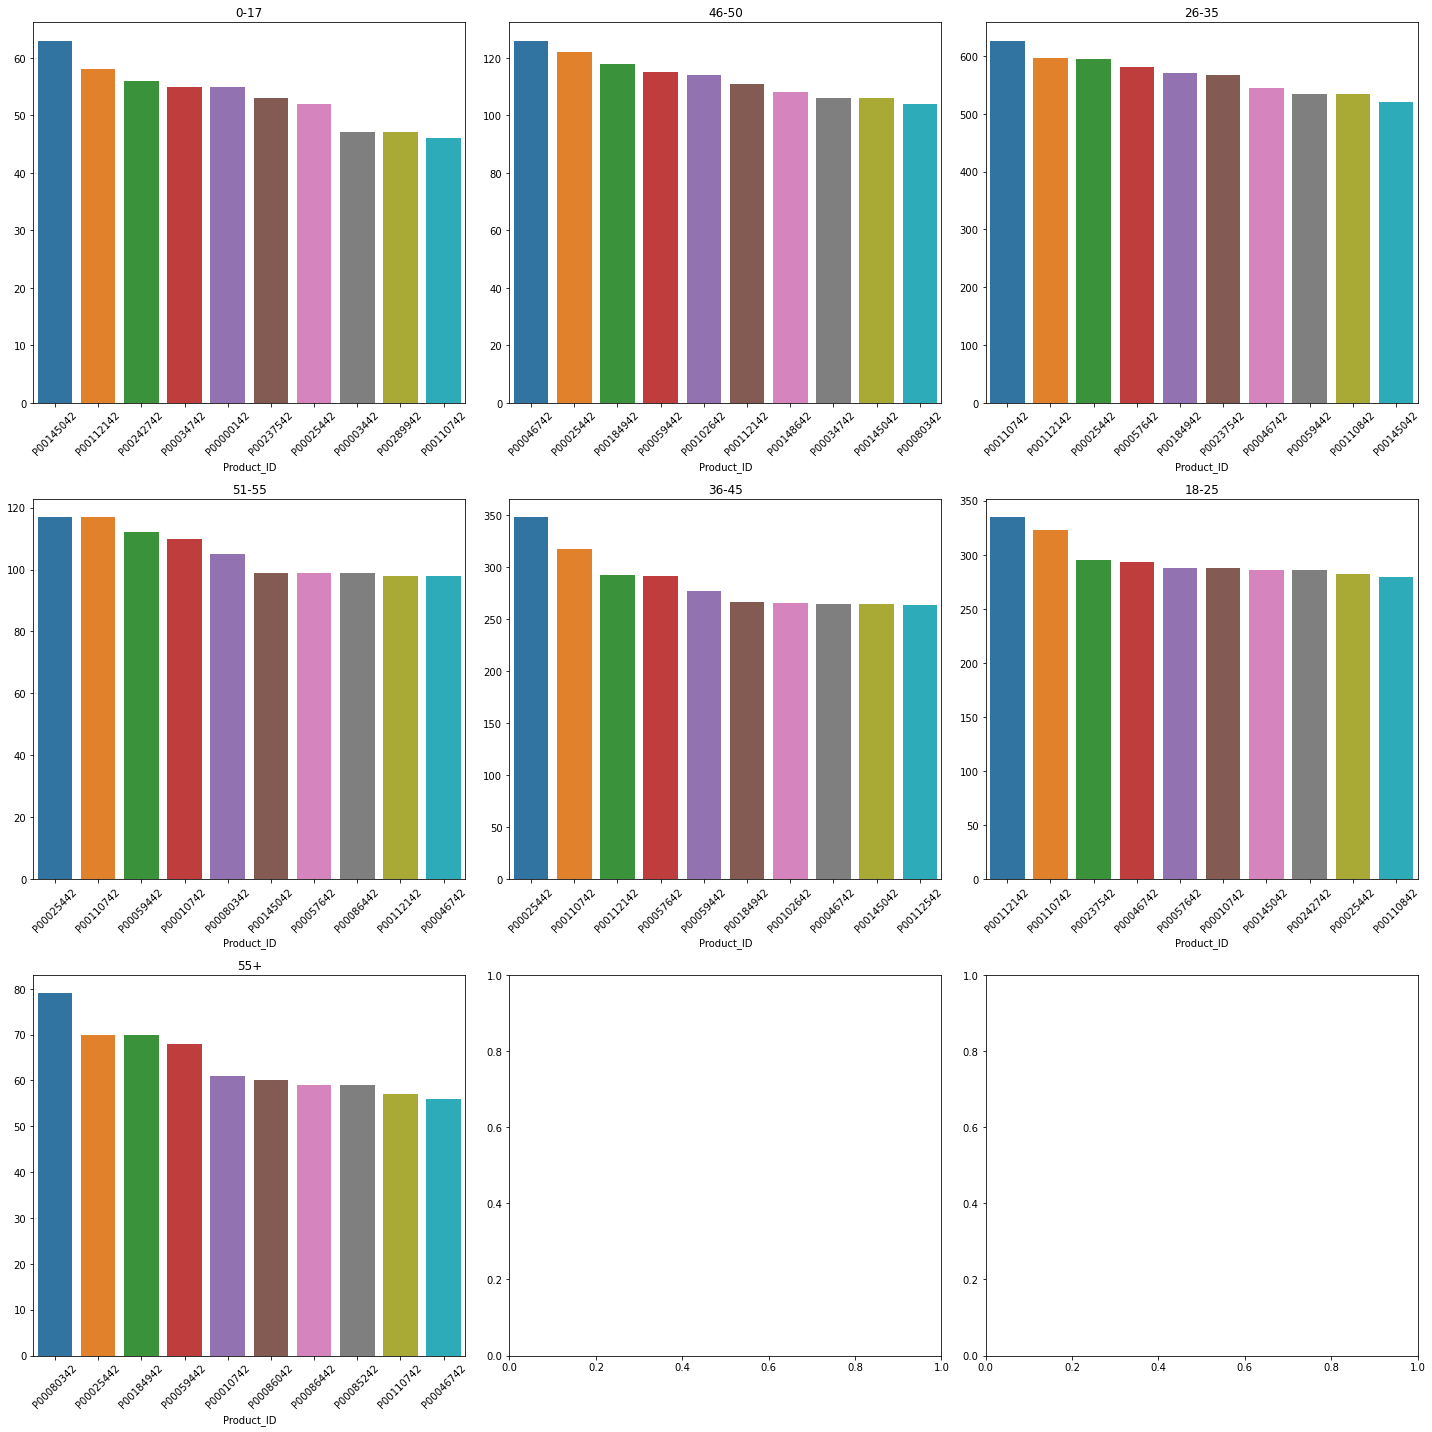

In [15]:
# 查看年龄段对购买的影响
# 查看年龄的分布
# 参数countplot计算数量，用order来年龄排序（从大到小），分别计算每个年龄段有多少个人，最后增加索引
sns.countplot(df['Age'],order=df['Age'].value_counts(ascending=False).index)

# 查看哪个年龄段消费金额最多（先对年龄段进行分组，再对购买金额求总和，再进行从大到小排序
plt.figure()
age_purchase = df.groupby("Age").sum()['Purchase'].sort_values(ascending=False)
sns.barplot(x=age_purchase.index,y=age_purchase.values)

# 查看每个年龄段，购买的top10的产品
# 要先对年龄和产品ID进行分组，再统计数量，再要排User_ID进行分组，再排序 
fig,axes = plt.subplots(3,3)#3行3列，可以画9个，因为有7个年龄段，要看7个
fig.set_figwidth(20)#设置宽度
fig.set_figheight(20)#设置高度
age_product_data = df.groupby(['Age','Product_ID']).count().sort_values(by="User_ID",ascending=False)
ages = df.Age.unique()#先取出年龄
for index,age in enumerate(ages):#有7个年龄段，用enumerate函数循环当前的年龄和索引
    products = age_product_data.loc[age].iloc[:10]['User_ID']#提取当前年龄段的前10个产品（loc根据索引名字来获取，iloc根据下标来获取）
    ax = axes[index//3,index%3]#行（求整除），列（求余数）-求出当前绘制在哪个ax上
    sns.barplot(x=products.index,y=products.values,ax=ax)
    ax.set_xticklabels(products.index,rotation=45)
    ax.set_title(age)
plt.tight_layout()#调整文字位置

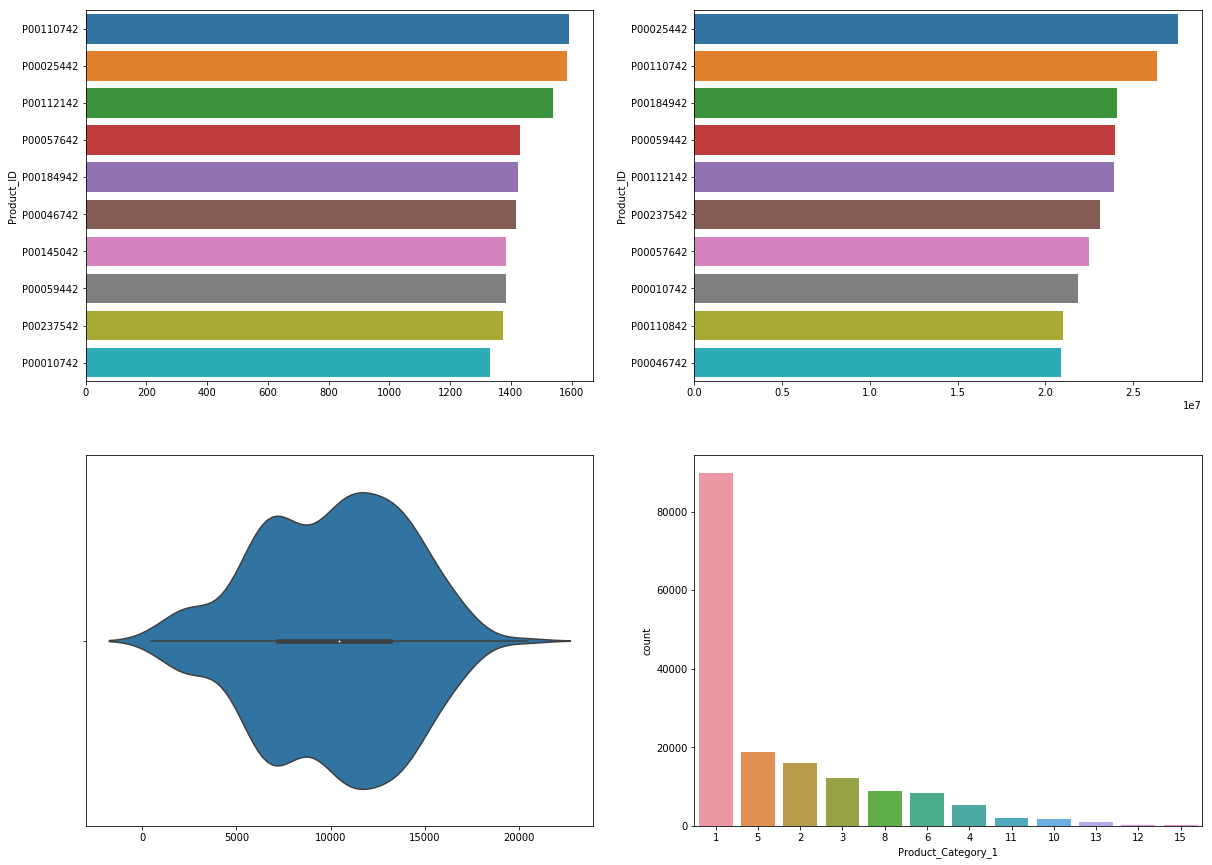

In [7]:
# 查看产品的销售情况
fig,axes = plt.subplots(2,2,figsize=(20,15))#绘制2行2列
# 1. 查看销售最多的10款产品
product_group = df.groupby("Product_ID").agg({"User_ID":"count","Purchase":"sum"})
ax1 = axes[0,0]
top10_count = product_group['User_ID'].sort_values(ascending=False)[:10]
sns.barplot(y=top10_count.index,x=top10_count.values,ax=ax1)

# 2. 查看销售额最多的10款产品
ax2 = axes[0,1]
top10_sum = product_group['Purchase'].sort_values(ascending=False)[:10]
sns.barplot(y=top10_sum.index,x=top10_sum.values,ax=ax2)

# 3. 查看所售产品的单价分布情况
ax3 = axes[1,0]
product_price = product_group['Purchase']/product_group['User_ID']#求出单价
# sns.distplot(product_price,ax=ax3)#绘制柱状和拆线图
sns.violinplot(product_price,ax=ax3)

# 4. 查看Product_Category_1的产品所属的类别的分布情况
category1 = df['Product_Category_1']
sns.countplot(category1,order=category1.value_counts(ascending=False).index)#先把category1拿出来，再按索引排序

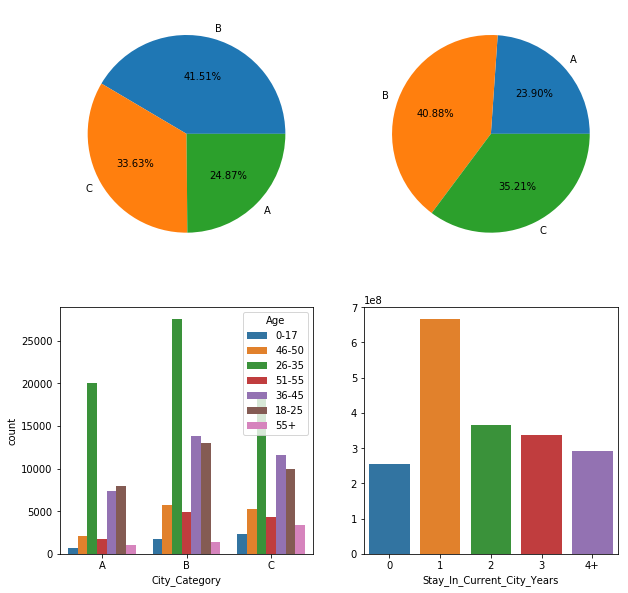

In [8]:
# 城市相关分析
fig,axes = plt.subplots(2,2,figsize=(10,10))#2行2列
# 不同的城市的购买人数情况分析
city_number = df['City_Category'].value_counts()#拿到3个城市的购买数量
axes[0,0].pie(city_number.values,labels=city_number.index,autopct="%.2f%%")

# 不同城市的消费金额分析
city_purchase = df.groupby('City_Category').sum()['Purchase']
axes[0,1].pie(city_purchase.values,labels=city_purchase.index,autopct="%.2f%%")

# 不同的城市的人的年龄分布（hue指的是一年条形图可以绘制多个，按照不同年龄绘制）
sns.countplot(x="City_Category",hue="Age",data=df,ax=axes[1,0])

# 在城市呆的年份与购买的关系
city_year = df.groupby("Stay_In_Current_City_Years").sum()['Purchase']
sns.barplot(x=city_year.index,y=city_year.values)

Text(0.5, 1.0, 'c-a differ')

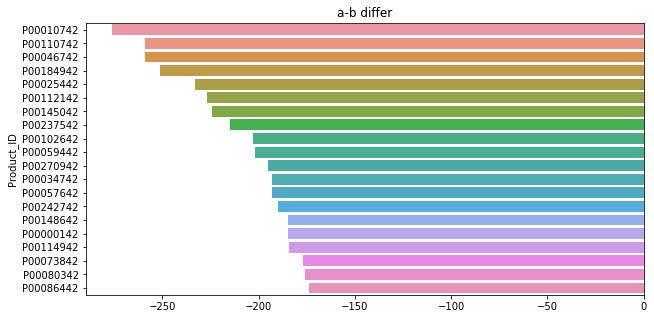

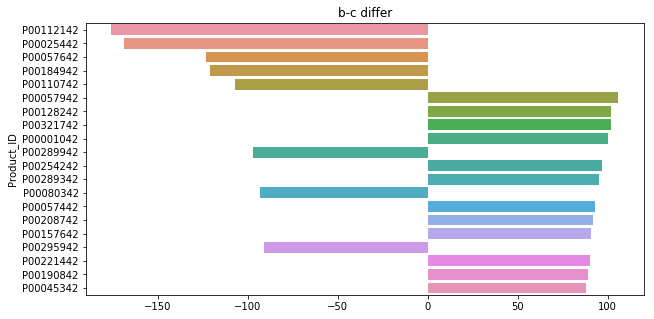

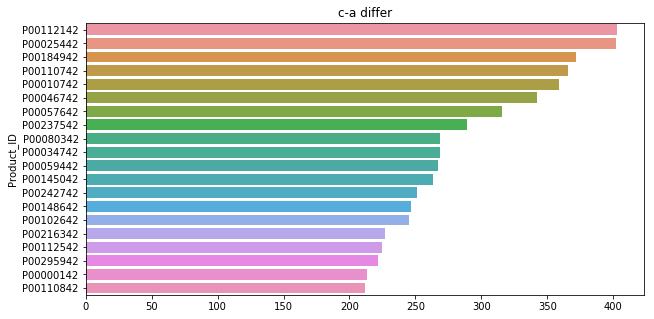

In [18]:
city_product = df.groupby(['City_Category','Product_ID']).count()['User_ID']#分析同一款商品在不同城市销售数量
a_city_product = city_product.loc['A']#分析三个城市都卖的产品，求出A城市的产品
b_city_product = city_product.loc['B']
c_city_product = city_product.loc['C']

common_index = a_city_product.index.intersection(b_city_product.index).intersection(c_city_product.index)#用intersection这个函数求出三个城市共同出现的产品交集，索引是product_ID

def city_differ_plot(city_product1,city_product2):
    city_differ = city_product1.loc[common_index] - city_product2.loc[common_index]
    order_index = np.abs(city_differ).sort_values(ascending=False)[:20].index # 求绝对值，再排序，取前20个产品，再求索引（拿到产品ID）
    city_differ_temp = city_differ.loc[order_index]
    plt.figure(figsize=(10,5))
    ax = sns.barplot(y=city_differ_temp.index,x=city_differ_temp.values)
    return ax

ax1 = city_differ_plot(a_city_product,b_city_product)
ax1.set_title("a-b differ")

ax2 = city_differ_plot(b_city_product,c_city_product)
ax2.set_title("b-c differ")

ax3 = city_differ_plot(c_city_product,a_city_product)
ax3.set_title("c-a differ")